<a href="https://colab.research.google.com/github/asdas6da6sd/practicas/blob/master/Interpolacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

import os
path='/content/drive/My Drive/prodim/'
os.chdir(path)

In [0]:
def displayGray3(a,b,c,title1 = "Original",title2 = "Edited", title3 = "Edited"):
  plt.figure(figsize=(3,3))
  plt.subplot(131), plt.imshow(a,cmap='gray'), plt.title(title1)
  plt.xticks([]), plt.yticks([])
  plt.subplot(132), plt.imshow(b,cmap='gray'), plt.title(title2)
  plt.xticks([]), plt.yticks([])
  plt.subplot(133), plt.imshow(c,cmap='gray'), plt.title(title3)
  plt.xticks([]), plt.yticks([])
  plt.show()
  
  
def displayGray2(a,b,c,title1 = "Original",title2 = "Edited"):
  plt.figure(figsize=(10,10))
  plt.subplot(121), plt.imshow(a,cmap='gray'), plt.title(title1)
  plt.xticks([]), plt.yticks([])
  plt.subplot(122), plt.imshow(b,cmap='gray'), plt.title(title2)
  plt.xticks([]), plt.yticks([])
  plt.show()
  
def displayColor3(a,b,c,title1 = "Original",title2 = "Edited", title3 = "Edited"):
  plt.figure(figsize=(10,10))
  plt.subplot(131), plt.imshow(a,), plt.title(title1)
  plt.xticks([]), plt.yticks([])
  plt.subplot(132), plt.imshow(b), plt.title(title2)
  plt.xticks([]), plt.yticks([])
  plt.subplot(133), plt.imshow(c), plt.title(title3)
  plt.xticks([]), plt.yticks([])
  plt.show()
  
def displayColor2(a,b,c,title1 = "Original",title2 = "Edited"):
  plt.figure(figsize=(10,10))
  plt.subplot(131), plt.imshow(a), plt.title(title1)
  plt.xticks([]), plt.yticks([])
  plt.subplot(132), plt.imshow(b), plt.title(title2)
  plt.xticks([])
  
  
def readRGB (imgPath):
  img= cv2.imread(imgPath)
  img= cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  return img

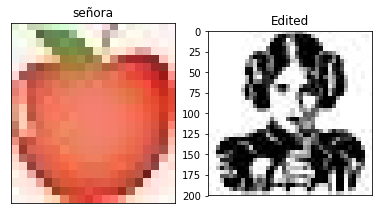

In [24]:
imgA = readRGB ('apple20x22.jpg')
imgM = readRGB('ico.jpg')
near_imgA = cv2.resize(imgA,None, fx= 5, fy= 5, interpolation = cv2.INTER_NEAREST)
near_imgM= cv2.resize(imgM,None,fx=5, fy= 5, interpolation = cv2.INTER_NEAREST)                                                                    
displayColor2(near_imgA,near_imgM, 'apple','señora')


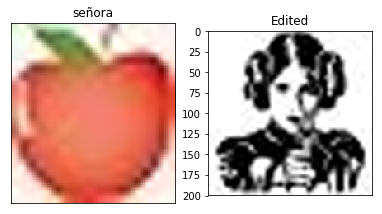

In [27]:
imgA = readRGB ('apple20x22.jpg')
imgM = readRGB('ico.jpg')
bili_imgA = cv2.resize(imgA,None, fx= 5, fy= 5, interpolation = cv2.INTER_LINEAR)
bili_imgM= cv2.resize(imgM,None,fx=5, fy= 5, interpolation = cv2.INTER_LINEAR)                                                                    
displayColor2(near_imgA,near_imgM, 'apple','señora')

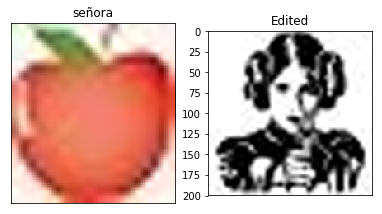

In [28]:
imgA = readRGB ('apple20x22.jpg')
imgM = readRGB('ico.jpg')
bicu_imgA = cv2.resize(imgA,None, fx= 5, fy= 5, interpolation = cv2.INTER_CUBIC)
bicu_imgM= cv2.resize(imgM,None,fx=5, fy= 5, interpolation = cv2.INTER_CUBIC)                                                                    
displayColor2(near_imgA,near_imgM, 'apple','señora')

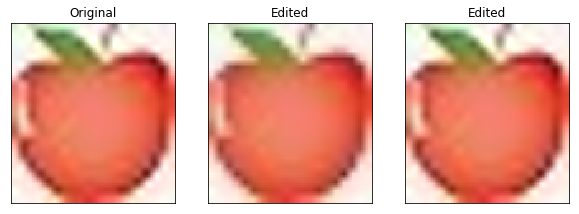

In [29]:
displayColor3(near_imgA,bili_imgA,bicu_imgA)

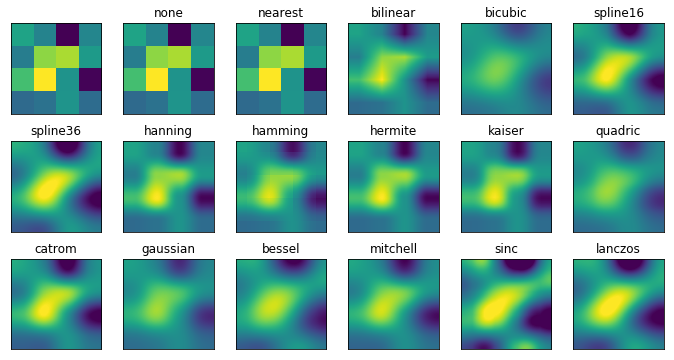

In [42]:
methods = [None, 'none','nearest','bilinear', 'bicubic', 'spline16', 'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric', 'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']
grid =np.random.rand(4,4)
#grid = imgM
fig, axes = plt.subplots(3, 6, figsize =(12,6), 
                         subplot_kw={'xticks':[],'yticks':[]})
fig.subplots_adjust(hspace =0.3, wspace = 0.05)

for ax, interp_method in zip(axes.flat,methods):
  ax.imshow(grid,interpolation = interp_method)
  ax.set_title(interp_method)
  
plt.show()

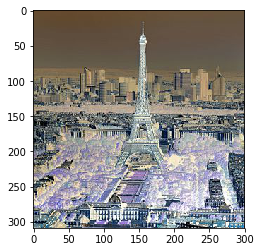

In [45]:
from PIL import Image
foto = Image.open('paris.jpg')
datos = list(foto.getdata())
datos_invertidos = [(255 - datos[x][0],255 - datos [x][1], 255 - datos [x][2])for x in range(len(datos))]
imagen_invertida = Image.new('RGB', foto.size)
imagen_invertida.putdata(datos_invertidos)
#imagen_invertida.save('playa2.jpg')
plt.imshow(np.asarray(imagen_invertida))


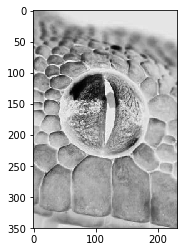

In [49]:
from PIL import Image
foto = Image.open('ojo.jpg')
datos = foto.getdata()
datos_invertidos = [255 - x for x in datos]
imagen_invertida = Image.new('L', foto.size)
imagen_invertida.putdata(datos_invertidos)
plt.imshow(np.asarray(imagen_invertida),cmap = 'gray')
                     


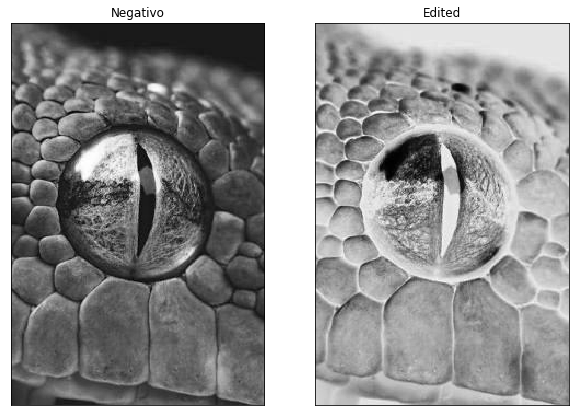

In [51]:
def negative(l):
  #Cargar imagen
  img = cv2.imread("ojo.jpg", cv2.IMREAD_GRAYSCALE)
  rows, columns = img.shape
  img2 = np.zeros((rows,columns), dtype = np.uint8)
  for x in range (rows):
    for y in range (columns):
          img2[x,y]= (l-1)-img[x,y]
  displayGray2(img,img2,'original','Negativo')
  return

negative(256)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


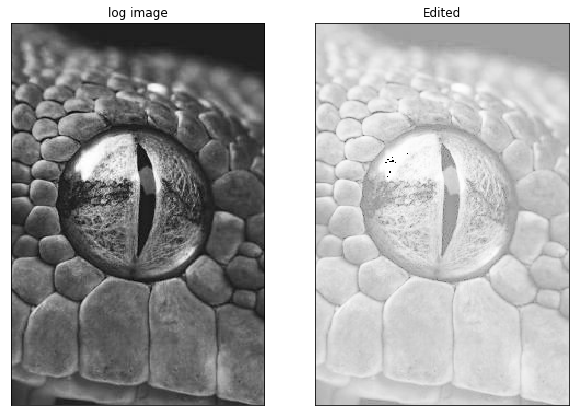

In [52]:
import cv2
import numpy as np
#Load the image
img =cv2.imread('ojo.jpg')
#Apply log transf.
img_log = (np.log(img+1)/(np.log(1+np.max(img))))*255
#Specify the data type
img_log =np.array(img_log,dtype=np.uint8)
#Display the image
displayGray2(img,img_log,'original','log image')